In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/My Drive/sales.csv")
print(dataframe)

                               Region  ... Total Profit
0               Australia and Oceania  ...    951410.50
1   Central America and the Caribbean  ...    248406.36
2                              Europe  ...    224598.75
3                  Sub-Saharan Africa  ...     19525.82
4                  Sub-Saharan Africa  ...    639077.50
..                                ...  ...          ...
95                 Sub-Saharan Africa  ...     65214.72
96                               Asia  ...     15103.47
97                 Sub-Saharan Africa  ...     93748.05
98                      North America  ...    144521.02
99                 Sub-Saharan Africa  ...    889472.91

[100 rows x 14 columns]


In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
dataframe.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
data = dataframe.rename(columns={'Units Sold': 'Sold'})
print(data)

                               Region  ... Total Profit
0               Australia and Oceania  ...    951410.50
1   Central America and the Caribbean  ...    248406.36
2                              Europe  ...    224598.75
3                  Sub-Saharan Africa  ...     19525.82
4                  Sub-Saharan Africa  ...    639077.50
..                                ...  ...          ...
95                 Sub-Saharan Africa  ...     65214.72
96                               Asia  ...     15103.47
97                 Sub-Saharan Africa  ...     93748.05
98                      North America  ...    144521.02
99                 Sub-Saharan Africa  ...    889472.91

[100 rows x 14 columns]


In [6]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
print(list(dataframe.columns))

['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


In [8]:
dataframe['Region']=np.where(dataframe['Region'] =='Sub-Saharan Africa', 'Africa', dataframe['Region'])

In [9]:
dataframe['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Africa', 'Asia', 'Middle East and North Africa',
       'North America'], dtype=object)

In [10]:
data['Sold'].value_counts()

8656    2
962     1
2125    1
4901    1
8102    1
       ..
8661    1
6489    1
4187    1
8156    1
282     1
Name: Sold, Length: 99, dtype: int64

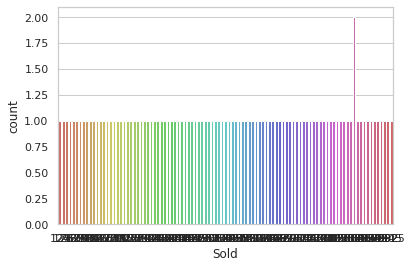

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x='Sold', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [12]:
dataframe.groupby('Unit Cost').mean()

,Order ID,Units Sold,Unit Price,Total Revenue,Total Cost,Total Profit
Unit Cost,,,,,,
6.92,5.419571e+08,4999.800000,9.33,4.664813e+04,3.459862e+04,1.204952e+04
31.79,4.360546e+08,7088.500000,47.45,3.363493e+05,2.253434e+05,1.110059e+05
35.84,5.813290e+08,5481.538462,109.28,5.990225e+05,1.964583e+05,4.025642e+05
56.67,5.742523e+08,4870.800000,81.73,3.980905e+05,2.760282e+05,1.220622e+05
90.93,7.985527e+08,3341.833333,154.06,5.148428e+05,3.038729e+05,2.109699e+05
97.44,5.581163e+08,4545.666667,152.58,6.935778e+05,4.429298e+05,2.506481e+05
117.11,7.610996e+08,3696.714286,205.70,7.604141e+05,4.329222e+05,3.274919e+05
159.42,6.642231e+08,5792.142857,255.28,1.478618e+06,9.233834e+05,5.552348e+05
263.33,4.971859e+08,6439.846154,437.20,2.815501e+06,1.695805e+06,1.119696e+06


In [13]:
dataframe.groupby('Unit Price').mean()

,Order ID,Units Sold,Unit Cost,Total Revenue,Total Cost,Total Profit
Unit Price,,,,,,
9.33,5.419571e+08,4999.800000,6.92,4.664813e+04,3.459862e+04,1.204952e+04
47.45,4.360546e+08,7088.500000,31.79,3.363493e+05,2.253434e+05,1.110059e+05
81.73,5.742523e+08,4870.800000,56.67,3.980905e+05,2.760282e+05,1.220622e+05
109.28,5.813290e+08,5481.538462,35.84,5.990225e+05,1.964583e+05,4.025642e+05
152.58,5.581163e+08,4545.666667,97.44,6.935778e+05,4.429298e+05,2.506481e+05
154.06,7.985527e+08,3341.833333,90.93,5.148428e+05,3.038729e+05,2.109699e+05
205.70,7.610996e+08,3696.714286,117.11,7.604141e+05,4.329222e+05,3.274919e+05
255.28,6.642231e+08,5792.142857,159.42,1.478618e+06,9.233834e+05,5.552348e+05
421.89,5.736862e+08,5337.500000,364.69,2.251838e+06,1.946533e+06,3.053050e+05


In [14]:
dataframe.groupby('Total Cost').mean()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Profit
Total Cost,,,,,,
3612.24,513417565,522,9.33,6.92,4870.26,1258.02
4657.16,816200339,673,9.33,6.92,6279.09,1621.93
11275.32,814711606,124,154.06,90.93,19103.44,7828.12
15134.04,142278373,2187,9.33,6.92,20404.71,5270.67
15470.91,617667090,273,81.73,56.67,22312.29,6841.38
...,...,...,...,...,...,...
3494663.16,986435210,6954,668.27,502.54,4647149.58,1152486.42
3521431.68,320009267,6708,651.21,524.96,4368316.68,846885.00
4145955.00,177713572,8250,668.27,502.54,5513227.50,1367272.50


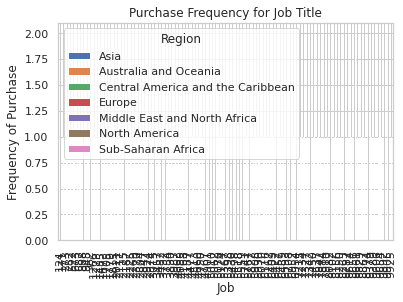

In [15]:
%matplotlib inline
pd.crosstab(data.Sold, data.Region).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

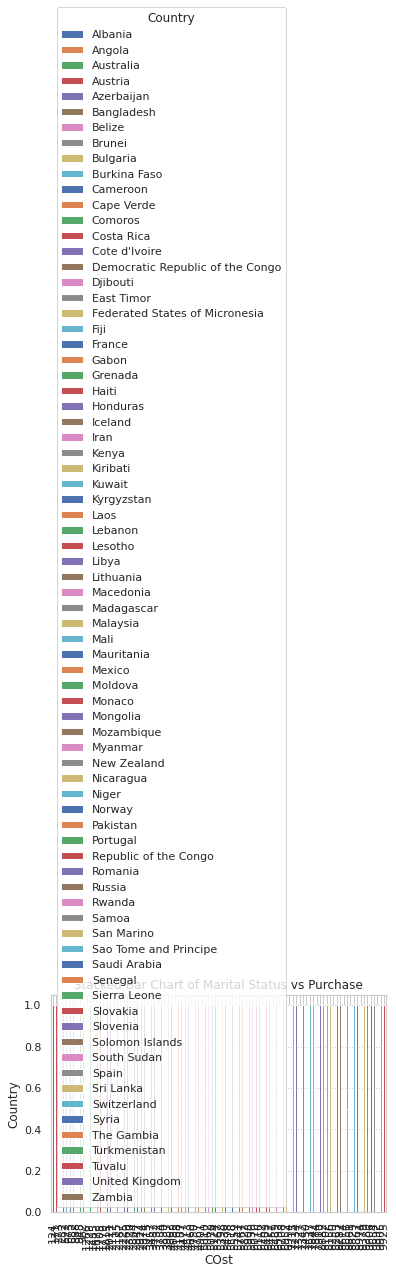

In [16]:
table=pd.crosstab(data.Sold, data.Country)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('COst')
plt.ylabel('Country')
plt.savefig('mariral_vs_pur_stack')


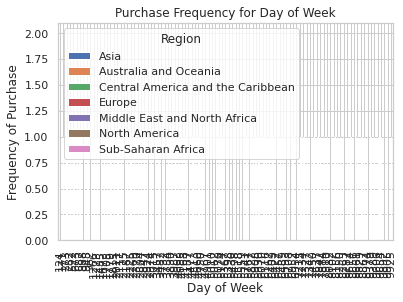

In [17]:
pd.crosstab(data.Sold, data.Region).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

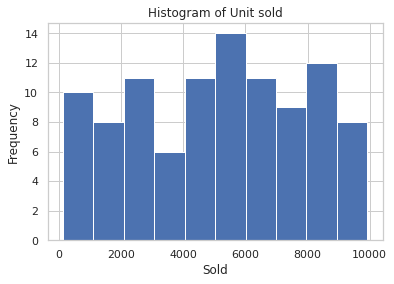

In [18]:
data.Sold.hist()
plt.title('Histogram of Unit sold')
plt.xlabel('Sold')
plt.ylabel('Frequency')
plt.savefig('hist_age')

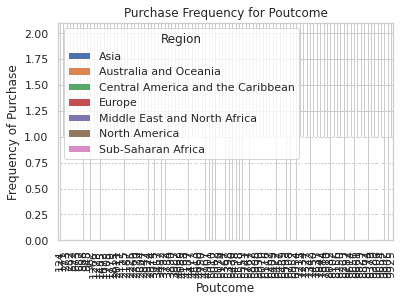

In [19]:
pd.crosstab(data.Sold ,data.Region).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')